In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
df = pd.read_csv(r"C:\Users\tonyd\OneDrive\바탕 화면\4-2\딥러닝 응용\data\DSA_features.csv")

In [41]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [42]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [43]:
# 필요한 두 개 activity만 필터링
df_filtered = df[df['activity'].isin(['sitting', 'jumping'])]

In [44]:
df_filtered = df_filtered.drop(columns=['people'])

In [45]:
df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,9.303061e-04,0.030501,0.334449,0.625187,0.691300,0.571870,9.188517e-04,0.030313,0.274486,jumping
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,9.968638e-04,0.031573,0.396417,0.624749,0.693560,0.570400,9.632708e-04,0.031037,0.433661,jumping
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,9.194098e-04,0.030322,0.524964,0.631822,0.690120,0.581970,8.933477e-04,0.029889,0.335023,jumping
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,5.788992e-04,0.024060,0.301200,0.624196,0.688560,0.573620,1.025797e-03,0.032028,0.272121,jumping


In [46]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# activity 열을 Label Encoding
df_filtered['activity'] = label_encoder.fit_transform(df_filtered['activity'])

# 변환된 activity 값 확인
print(df_filtered['activity'].value_counts())

activity
1    480
0    480
Name: count, dtype: int64


In [47]:
# 데이터 확인
print(df_filtered['activity'].value_counts())

activity
1    480
0    480
Name: count, dtype: int64


In [48]:
# 훈련/테스트 분리 (80% 훈련, 20% 테스트)
train_data, test_data = train_test_split(df_filtered, test_size=0.2, random_state=42)

# 훈련 데이터를 다시 훈련/검증(training/validation)으로 분리
train_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=42)

y_test = test_data['activity']

In [49]:
print(train_data.dtypes)


T_xacc_mean     float64
T_xacc_max      float64
T_xacc_min      float64
T_xacc_var      float64
T_xacc_std      float64
                 ...   
LL_zmag_min     float64
LL_zmag_var     float64
LL_zmag_std     float64
LL_zmag_skew    float64
activity          int32
Length: 271, dtype: object


In [50]:
# 'activity' 열을 float64로 변환
train_data['activity'] = train_data['activity'].astype('float64')
valid_data['activity'] = valid_data['activity'].astype('float64')


In [51]:
# 'jumping' 데이터 제거 (검증 세트에서만)
valid_data_normal = valid_data[valid_data['activity'] == 1]
train_data_normal = train_data[train_data['activity'] == 1]

In [52]:
train_data_normal

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
417,9.093501,9.1954,9.0013,0.001490,0.038603,0.022129,-2.031048,-1.90470,-2.11940,0.001321,...,5.449339e-07,0.000738,0.201130,0.712732,0.714540,0.711110,4.650123e-07,0.000682,0.104129,1.0
268,6.967674,7.0411,6.8843,0.000778,0.027894,-0.435737,-0.417147,-0.37141,-0.49734,0.000515,...,4.204708e-07,0.000648,0.141325,0.289135,0.291050,0.287160,5.971381e-07,0.000773,-0.016001,1.0
112,9.749724,9.8641,9.6563,0.000798,0.028250,0.083667,-0.939386,-0.79238,-1.07400,0.002997,...,6.640928e-07,0.000815,0.324868,0.636716,0.638680,0.635040,5.010555e-07,0.000708,0.242637,1.0
237,9.172918,9.2632,9.0840,0.000952,0.030847,-0.082174,-1.585316,-1.53060,-1.66450,0.000437,...,1.245184e-06,0.001116,-0.374700,0.569028,0.570860,0.567270,6.637867e-07,0.000815,0.199149,1.0
227,9.160043,9.2711,9.0326,0.001244,0.035271,-0.262311,-1.584392,-1.51600,-1.64850,0.000530,...,1.282897e-06,0.001133,-0.074299,0.569232,0.571400,0.566490,5.939894e-07,0.000771,-0.366702,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,7.978140,8.1556,7.8706,0.004612,0.067913,0.671826,-0.273028,-0.20721,-0.39282,0.001328,...,6.945784e-07,0.000833,-0.378881,0.297196,0.299440,0.294590,1.194330e-06,0.001093,-0.241786,1.0
307,8.160624,8.3469,8.0181,0.004544,0.067410,0.401436,-0.507913,-0.39617,-0.58263,0.001791,...,5.296969e-07,0.000728,-0.098854,0.077310,0.079263,0.075804,5.462673e-07,0.000739,0.004047,1.0
305,8.183026,8.3098,8.0628,0.003177,0.056367,0.244991,-0.500126,-0.41909,-0.58294,0.001004,...,4.277207e-07,0.000654,-0.062616,0.076656,0.078199,0.074848,5.220937e-07,0.000723,0.086964,1.0
257,6.915084,6.9811,6.8318,0.000840,0.028983,-0.497495,-0.464661,-0.40077,-0.53438,0.000491,...,4.865609e-07,0.000698,-0.265579,0.289035,0.290500,0.286960,5.116848e-07,0.000715,-0.157418,1.0


In [53]:
# 오토인코더 모델
input_dim = train_data_normal.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

# 입력층 및 인코딩 레이어에 L2 정규화와 드롭아웃 추가
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
encoded = Dropout(0.5)(encoded)  # 드롭아웃 추가
encoded = Dense(int(encoding_dim / 2), activation='relu', kernel_regularizer=l2(0.001))(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu', kernel_regularizer=l2(0.001))(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [54]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(train_data_normal, train_data_normal, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_data=(valid_data_normal, valid_data_normal))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - loss: 5.5367 - val_loss: 5.6459
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 5.5196 - val_loss: 5.6261
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 5.4965 - val_loss: 5.6034
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 5.4765 - val_loss: 5.5781
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 5.4483 - val_loss: 5.5505
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - loss: 5.4274 - val_loss: 5.5209
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 5.3952 - val_loss: 5.4896
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 5.3636 - val_loss: 5.4571
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 5.3257 - val_loss: 5.4238
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 5.3011 - val_loss: 5.3900
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 5.2681 - val_loss: 5.3561
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - loss: 5.2332 - val_loss

In [55]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


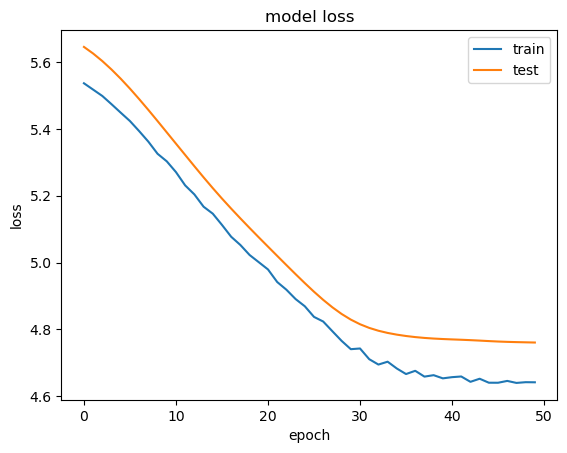

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [57]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


,reconstruction_error,true_class
count,192.000000,192.000000
mean,291.080998,0.447917
std,434.874928,0.498580
min,4.398357,0.000000
25%,4.557574,0.000000
50%,70.557825,0.000000
75%,491.418813,1.000000
max,2918.507763,1.000000


In [58]:
error_df.head()

,reconstruction_error,true_class
8516,131.073085,0
477,4.855617,1
350,4.557975,1
8573,874.903012,0
8603,371.421451,0


In [67]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 18

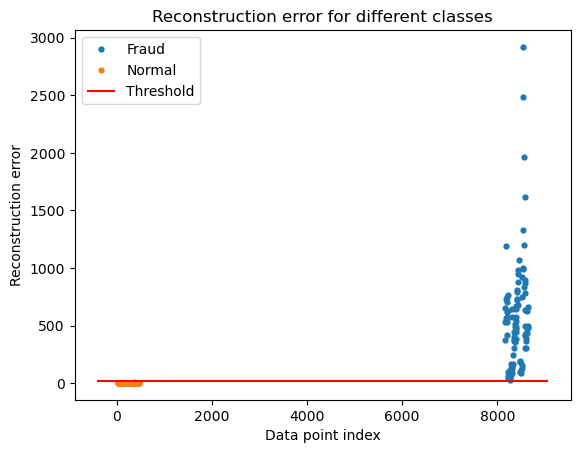

In [68]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 0 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [69]:
LABELS = ["Normal", "Fraud"]

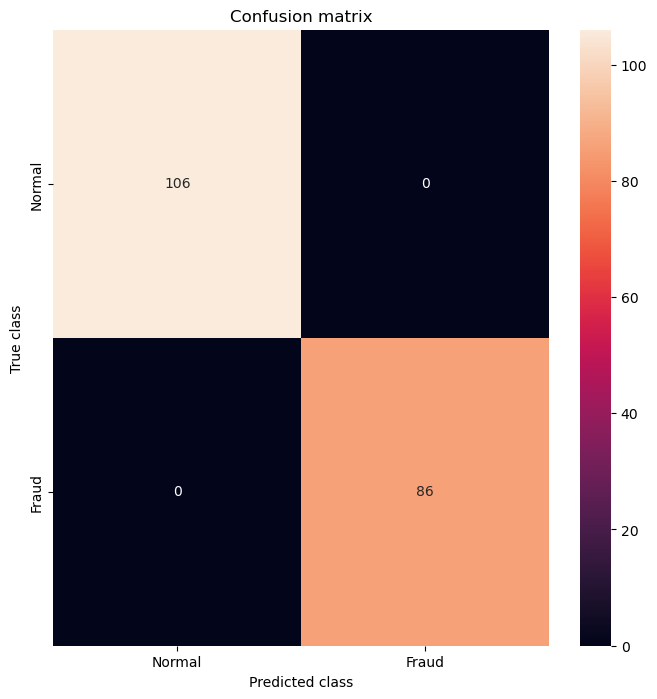

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        86

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))